In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from xgboost.sklearn import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
from sklearn import metrics
from sklearn.model_selection import train_test_split
RANDOM_SEED = 42

D:\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
last_dirs = ["1_android.sensor.accelerometer.data.csv.gz"]#,"4_android.sensor.gyroscope.data.csv.gz"]
path = "Sessions_new/"
dirs = []
dir_list = [x[0] for x in os.walk(path)]
for each_dir in dir_list[2:]:

    if "data" in each_dir:
    #each_file = os.listdir(each_dir)
        dirs.append(each_dir)
        


dirs.sort(key=lambda x:x[-22:])
gy_shapes = []
print(dirs[0])
#avg_acc_gy = pd.DataFrame(columns = ["avg_acc_x","avg_acc_y","avg_acc_x", "avg_gyroscope_x",  "avg_gyroscope_y",  "avg_gyroscope_z",  "label"])
for i in dirs[0:1]:
    #print(i)
    full_path_acc = os.path.normpath(i + "/" + "1_android.sensor.accelerometer.data.csv.gz")
    full_path_gy = os.path.normpath(i + "/" + "4_android.sensor.gyroscope.data.csv.gz")
    print("processing : " + full_path_acc)
    df_ac = pd.read_csv(full_path_acc, compression='gzip', sep=',', header=None)
    df_gy = pd.read_csv(full_path_gy, compression='gzip', sep=',', header=None)
    #new_df_ac = process_avg_acceleration(df_ac)
    #new_df_gy = process_avg_gyroscope(df_gy)
    #print(new_df_ac.head())
    #print(new_df_gy.head())
    #if new_df_gy.shape[0] < new_df_ac.shape[0]:
        #new_df_ac = new_df_ac[:new_df_gy.shape[0]]
    #new_df = pd.concat([new_df_ac,new_df_gy], axis = 1)
    #print(new_df.head())   
    #print(new_df.shape)
    #print(avg_acc_gy.shape)
    #gy_shapes.append(new_df.shape)
    #avg_acc_gy = new_df

for i in dirs[1:]:
    print(i)
    full_path_acc = os.path.normpath(i + "/" + "1_android.sensor.accelerometer.data.csv.gz")
    full_path_gy = os.path.normpath(i + "/" + "4_android.sensor.gyroscope.data.csv.gz")
    #if full_path_acc == "Sessions2\Sessions2\14442D57F7E1B88_Mon_Feb_12_18-26_2018_PST\data\1_android.sensor.accelerometer.data.csv.gz":
        #continue
    print("processing : " + full_path_acc)
    df_ac_new = pd.read_csv(full_path_acc, compression='gzip', sep=',', header=None)
    #print("processing : " + full_path_gy)
    #df_gy = pd.read_csv(full_path_gy, compression='gzip', sep=',', header=None)
    #new_df_ac = process_avg_acceleration(df_ac)
    #new_df_gy = process_avg_gyroscope(df_gy)
    #print(new_df_ac.head())
    #print(new_df_gy.head())
    #if new_df_gy.shape[0] < new_df_ac.shape[0]:
    #df_ac = new_df_ac[:new_df_gy.shape[0]]
    print(df_ac.shape)
    df_ac = pd.concat([df_ac,df_ac_new], axis = 0)
    #print(new_df.head())   
    #print(new_df.shape)
    #print(avg_acc_gy.shape)
    #gy_shapes.append(new_df.shape)
    #avg_acc_gy = pd.concat([avg_acc_gy,new_df])


print(df_ac.shape)

Sessions_new/14442D57F7E1B88_Thu_Feb_08_00-16_2018_PST\data
processing : Sessions_new\14442D57F7E1B88_Thu_Feb_08_00-16_2018_PST\data\1_android.sensor.accelerometer.data.csv.gz
Sessions_new/14442D57F7E1B88_Thu_Feb_08_00-18_2018_PST\data
processing : Sessions_new\14442D57F7E1B88_Thu_Feb_08_00-18_2018_PST\data\1_android.sensor.accelerometer.data.csv.gz
(2794, 6)
Sessions_new/14442D57F7E1B88_Thu_Feb_08_00-25_2018_PST\data
processing : Sessions_new\14442D57F7E1B88_Thu_Feb_08_00-25_2018_PST\data\1_android.sensor.accelerometer.data.csv.gz
(5501, 6)
Sessions_new/14442D57F7E1B88_Thu_Feb_08_00-31_2018_PST\data
processing : Sessions_new\14442D57F7E1B88_Thu_Feb_08_00-31_2018_PST\data\1_android.sensor.accelerometer.data.csv.gz
(10489, 6)
Sessions_new/14442D57F7E1B88_Thu_Feb_08_00-35_2018_PST\data
processing : Sessions_new\14442D57F7E1B88_Thu_Feb_08_00-35_2018_PST\data\1_android.sensor.accelerometer.data.csv.gz
(44868, 6)
Sessions_new/14442D57F7E1B88_Thu_Feb_08_00-38_2018_PST\data
processing : Sessi

In [3]:
def feature_normalize(dataset):
    mu = np.mean(dataset,axis = 0)
    sigma = np.std(dataset,axis = 0)
    return (dataset - mu)/sigma
def plot_axis(ax, x, y, title):
    ax.plot(x, y)
    ax.set_title(title)
    ax.xaxis.set_visible(False)
    ax.set_ylim([min(y) - np.std(y), max(y) + np.std(y)])
    ax.set_xlim([min(x), max(x)])
    ax.grid(True)
def plot_activity(activity,data):
    fig, (ax0, ax1, ax2) = plt.subplots(nrows = 3, figsize = (15, 10), sharex = True)
    plot_axis(ax0, data[0], data[1], 'x-axis')
    plot_axis(ax1, data[0], data[2], 'y-axis')
    plot_axis(ax2, data[0], data[3], 'z-axis')
    plt.subplots_adjust(hspace=0.2)
    fig.suptitle(activity)
    plt.subplots_adjust(top=0.90)
    plt.show()

In [4]:
df_ac.head()

,0,1,2,3,4,5
0,1518077795949,1.699485,2.139914,8.976151,3,sitting
1,1518077795958,1.699485,2.120765,9.033598,3,sitting
2,1518077795962,1.737783,2.120765,8.976151,3,sitting
3,1518077795966,1.776081,2.063318,8.995299,3,sitting
4,1518077795970,1.737783,2.025020,8.918703,3,sitting


In [5]:
df_ac[1] = feature_normalize(df_ac[1])
df_ac[2] = feature_normalize(df_ac[2])
df_ac[3] = feature_normalize(df_ac[3])

In [6]:
df_ac.head()

,0,1,2,3,4,5
0,1518077795949,0.744701,0.361942,1.795286,3,sitting
1,1518077795958,0.744701,0.359016,1.807978,3,sitting
2,1518077795962,0.751369,0.359016,1.795286,3,sitting
3,1518077795966,0.758036,0.350238,1.799516,3,sitting
4,1518077795970,0.751369,0.344386,1.782593,3,sitting


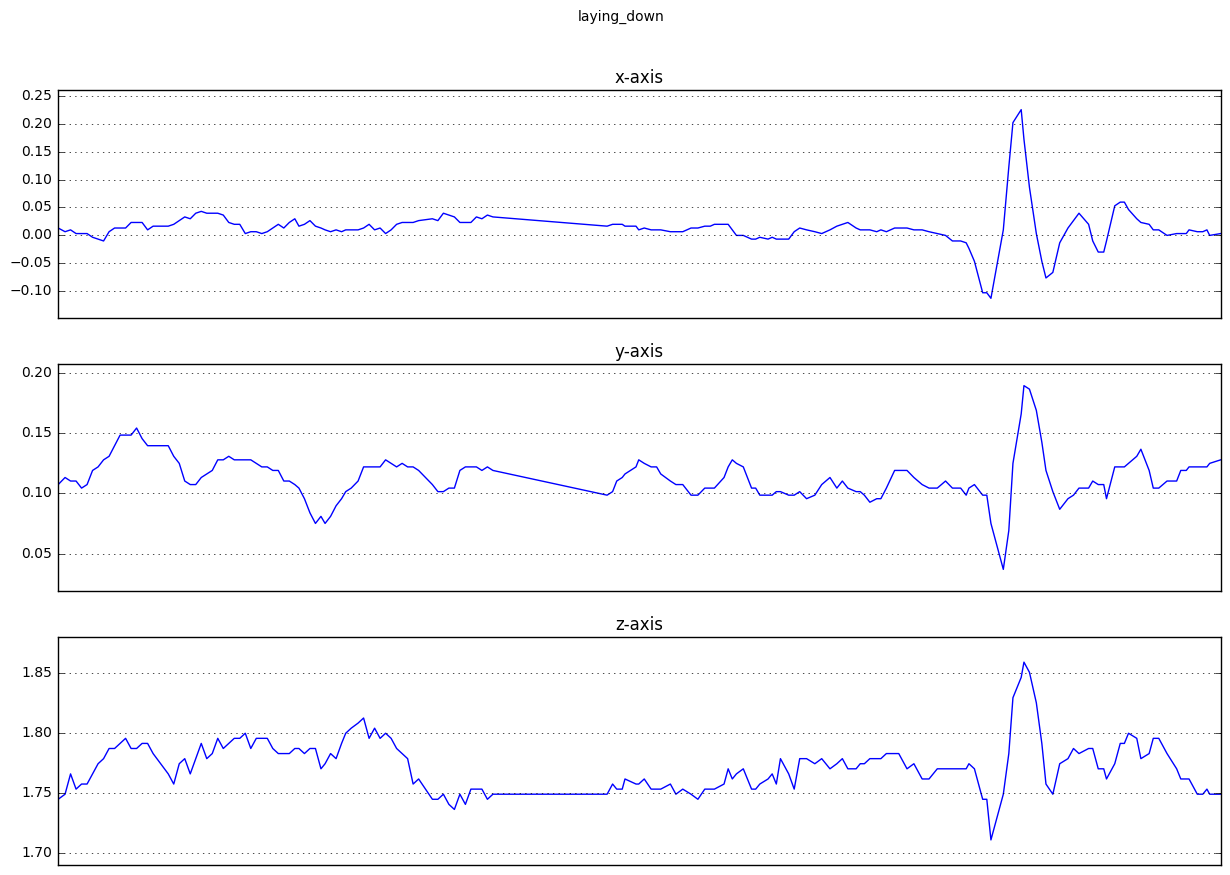

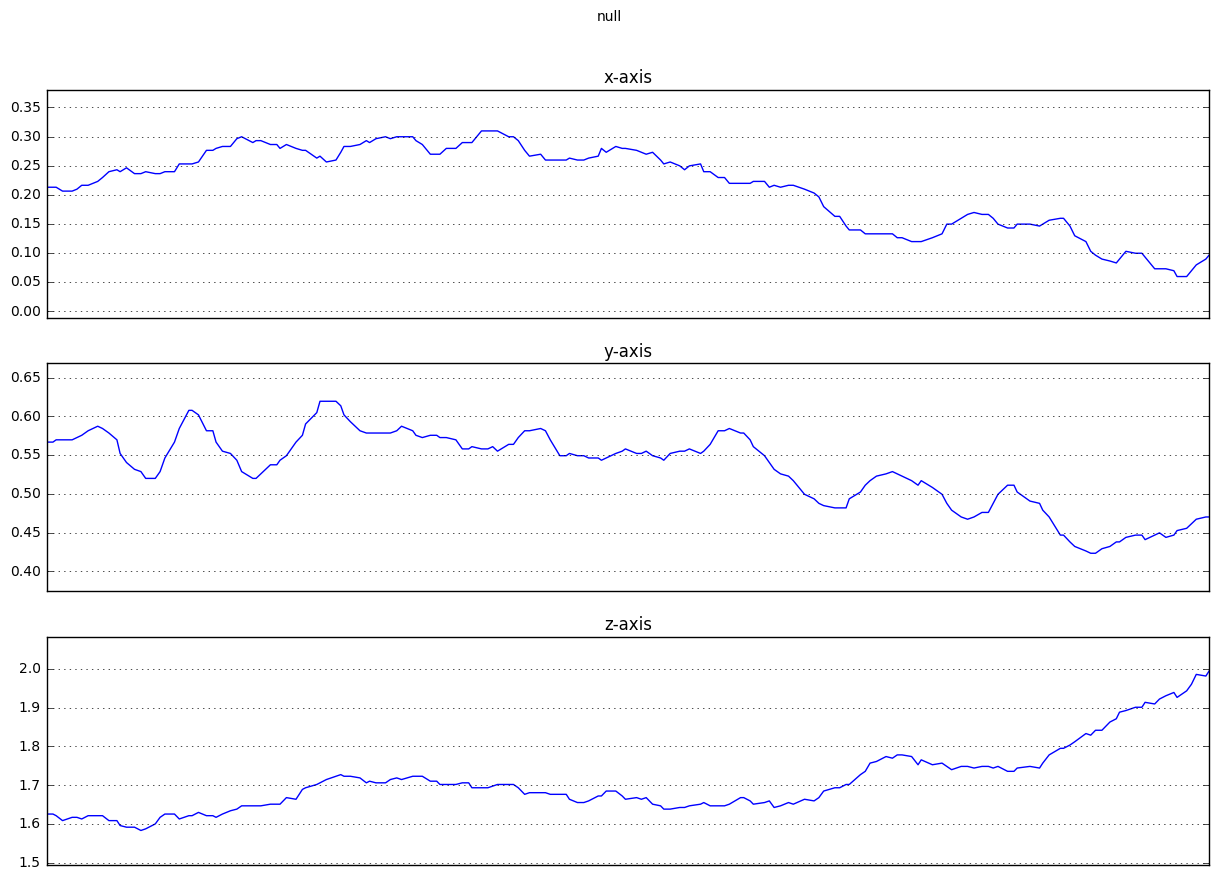

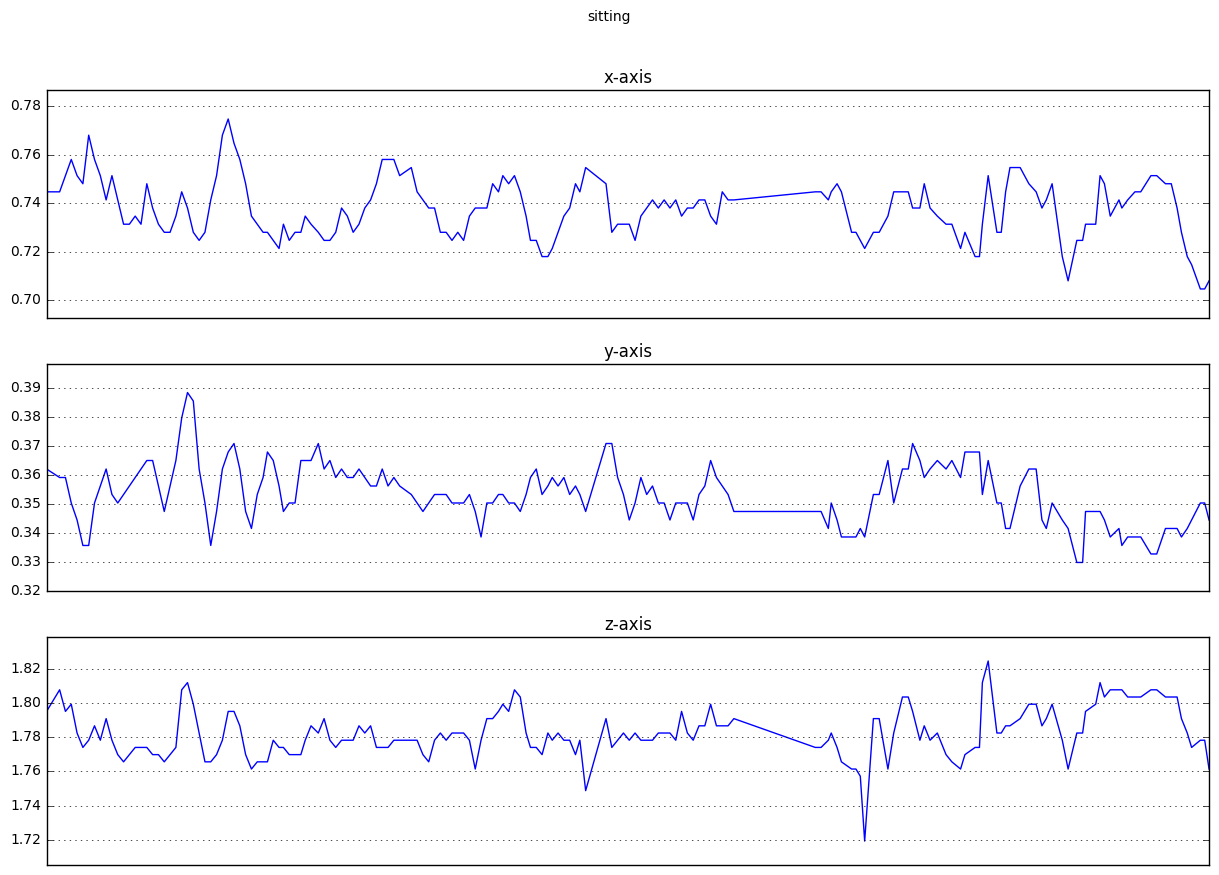

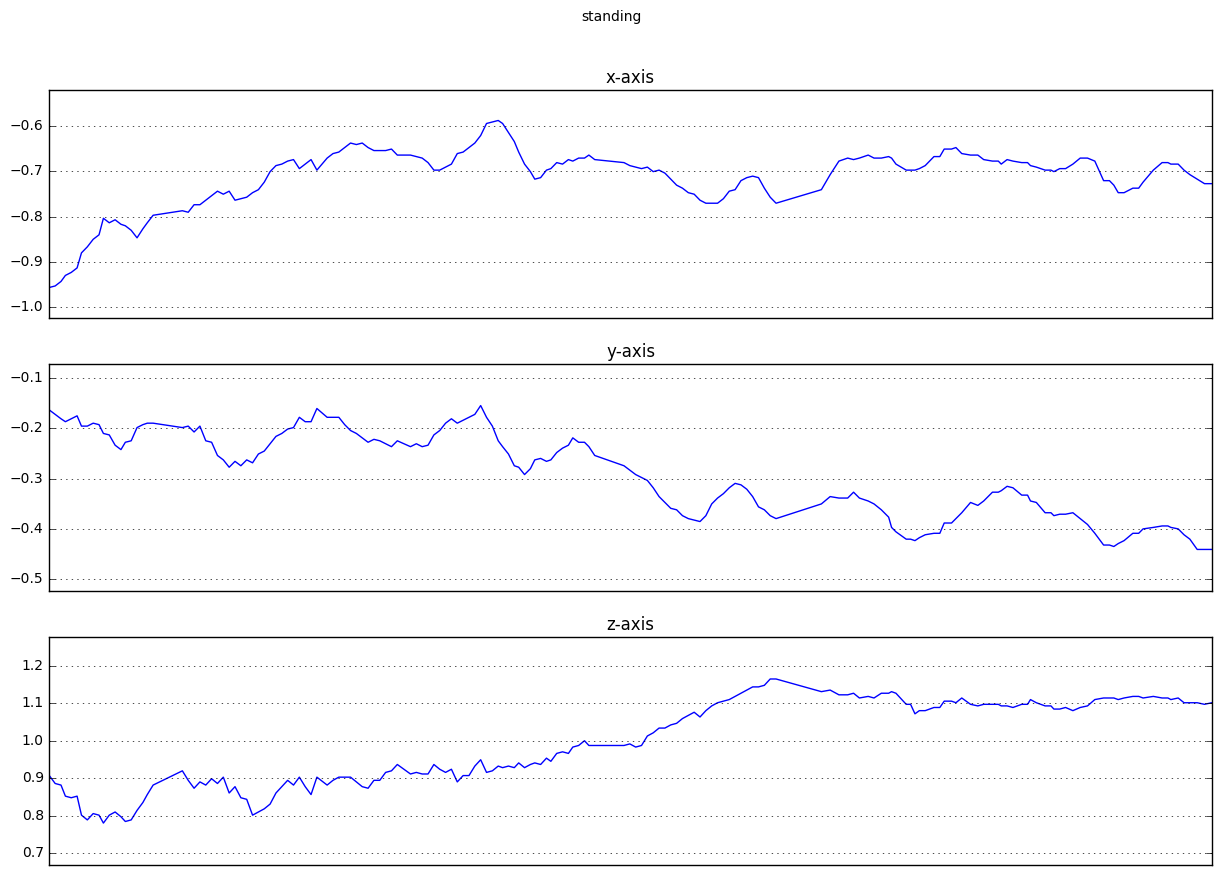

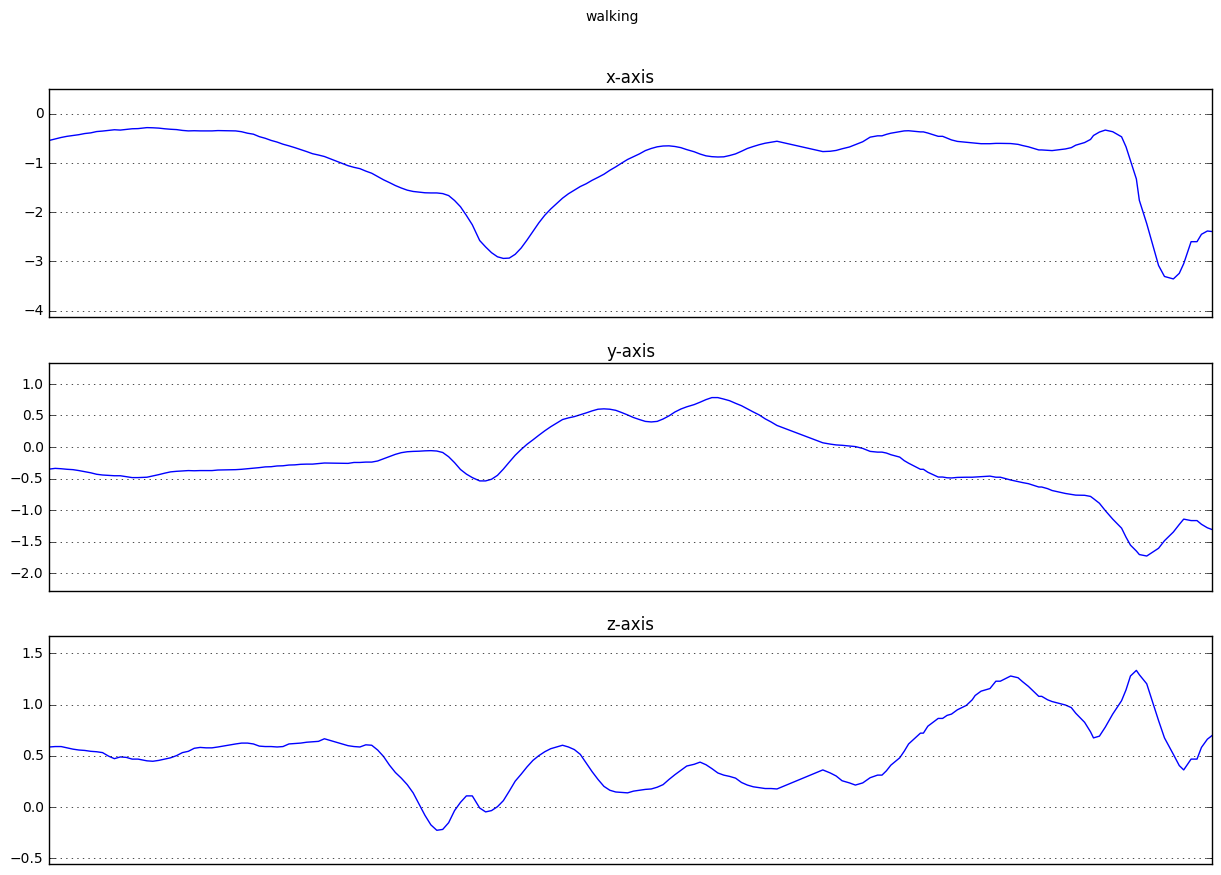

In [7]:
for activity in np.unique(df_ac[5]):
    subset = df_ac[df_ac[5] == activity][:180]
    plot_activity(activity,subset)

In [8]:
def windows(data, size):
    start = 0
    while start < data.count():
        yield int(start), int(start + size)
        start += (size / 2)
        
def segment_signal(data,window_size = 90):
    segments = np.empty((0,window_size,3))
    labels = np.empty((0))
    for (start, end) in windows(data[0], window_size):
        x = data[1][start:end]
        y = data[2][start:end]
        z = data[3][start:end]
        if(len(df_ac[0][start:end]) == window_size):
            segments = np.vstack([segments,np.dstack([x,y,z])])
            labels = np.append(labels,stats.mode(data[5][start:end])[0][0])
    return segments, labels

In [ ]:
segments, labels = segment_signal(df_ac)
labels = np.asarray(pd.get_dummies(labels), dtype = np.int8)
reshaped_segments = segments.reshape(len(segments), 1,90, 3)

D:\Anaconda\lib\site-packages\scipy\stats\stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)
